In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

### load_digits() dataset from sklearn

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.data)
print(len(digits.data))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
1797


In [5]:
print(digits.target)
print(len(digits.target))

[0 1 2 ... 8 9 8]
1797


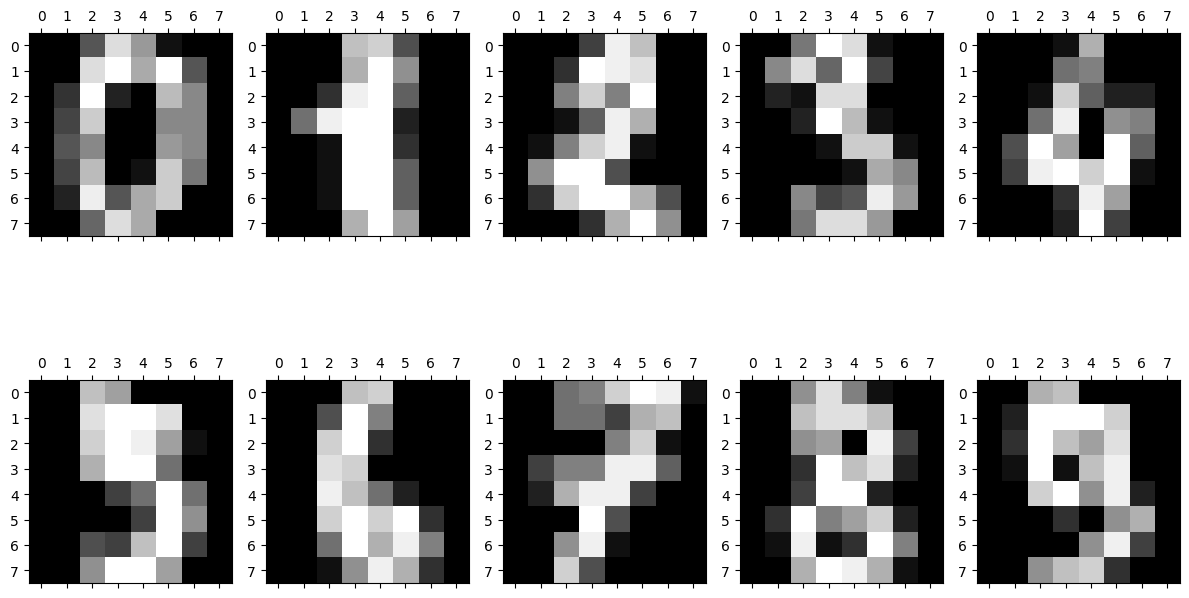

In [6]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 8))

plt.gray()
num = 0
for i in range(2):
  for j in range(5):
    axes[i][j].matshow(digits.images[num])
    num += 1

fig.tight_layout()
plt.show()

### MLP class

In [7]:
class MLP(torch.nn.Module):
  def __init__(self, layers_count, layers_sizes, activation_func_for_each_layer):
    super().__init__()
    self.layers_count = layers_count
    self.layers_sizes = layers_sizes
    self.activation_func_for_each_layer = activation_func_for_each_layer
    self.layers = torch.nn.Sequential()

    for i in range(self.layers_count - 1):
      self.layers.append(torch.nn.Linear(in_features=self.layers_sizes[i], out_features=self.layers_sizes[i+1]))
      self.layers.append(self.activation_func_for_each_layer[i])

  def forward(self, x):
    return self.layers(x)


In [66]:
class DigitsDataset(Dataset):
  def __init__(self, X, labels):
    # convert into PyTorch tensors
    self.X = torch.from_numpy(X).to(dtype=torch.float32)
    self.labels = torch.from_numpy(labels).to(dtype=torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return (self.X[idx], self.labels[idx])


In [9]:
X = digits.data
y = digits.target

print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


### Testing MLP class using load_digits() dataset from sklearn

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

digits_data_training = DigitsDataset(X_train, y_train)
digits_data_testing = DigitsDataset(X_test, y_test)

train_loader = DataLoader(digits_data_training, batch_size=16, shuffle=True)
test_loader = DataLoader(digits_data_testing, batch_size=16)

In [68]:
# Model initializing
mlp = MLP(4, [64, 32, 16, 10], [torch.nn.ReLU(), torch.nn.ReLU(), torch.nn.Softmax(dim=1)])

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [69]:
n = len(train_loader)

# Train loop
for epoch in range(0, 25):
  print(f'\nStarting Epoch {epoch + 1}')

  current_loss = 0.0

  for images, labels in train_loader:
    optimizer.zero_grad()

    outputs = mlp(images)
    loss = loss_function(outputs, labels.long())
    loss.backward()
    optimizer.step()  # update the values

    current_loss += loss.item()

  loss_after_epoch = current_loss / n
  print(f"Epoch {epoch + 1} - Training loss: {loss_after_epoch}")

print("\nTraining has completed")


Starting Epoch 1
Epoch 1 - Training loss: 2.136017416505253

Starting Epoch 2
Epoch 2 - Training loss: 1.894647558997659

Starting Epoch 3
Epoch 3 - Training loss: 1.7436171994489782

Starting Epoch 4
Epoch 4 - Training loss: 1.7044531836229213

Starting Epoch 5
Epoch 5 - Training loss: 1.6911638203789205

Starting Epoch 6
Epoch 6 - Training loss: 1.6800333387711468

Starting Epoch 7
Epoch 7 - Training loss: 1.6205716848373413

Starting Epoch 8
Epoch 8 - Training loss: 1.5983959787032183

Starting Epoch 9
Epoch 9 - Training loss: 1.5894559635835535

Starting Epoch 10
Epoch 10 - Training loss: 1.584046807008631

Starting Epoch 11
Epoch 11 - Training loss: 1.5850778944352093

Starting Epoch 12
Epoch 12 - Training loss: 1.5769778419943417

Starting Epoch 13
Epoch 13 - Training loss: 1.57425259141361

Starting Epoch 14
Epoch 14 - Training loss: 1.5758630458046408

Starting Epoch 15
Epoch 15 - Training loss: 1.5723493379705094

Starting Epoch 16
Epoch 16 - Training loss: 1.5718904761707082